# Árvores de decisão e florestas aleatórias em Python

**Por que árvores de decisão são tão populares?**

- Fácil explicabilidade e interpretação, já que podemos facilmente visualizá-las (quando não são muito profundas).
- Requerem pouco esforço na preparação dos dados, métodos baseados em árvores normalmente não requerem normalização dos dados. Além disso, conseguem lidar com valores faltantes, categóricos e numéricos (não é o caso da CART que implementamos).
- Complexidade logarítmica na etapa de predição.
- São capazes de lidar com problemas com múltiplos rótulos.
- As árvores de decisão muito populares para problemas de classificação, regressão, análise exploratória entre outras tarefas.

**Árvores de decisão possuem alguns probleminhas que podem degradar seu poder preditivo, são eles**
- Árvore crescida até sua profundidade máxima pode decorar o conjunto de treino (o temido overfitting), o que pode degradar seu poder preditivo quando aplicado a novos dados. Isso pode ser mitigado "podando" a árvore de decisão ao atribuir uma profundidade máxima ou uma quantidade máxima de folhas.
- São modelos instáveis (alta variância), pequena variações nos dados de treino podem resultar em árvores completamente distintas. Isso pode ser evitado ao treinarmos várias árvores distintas e agregar suas predições (que veremos em outro post).
- Como vimos, o algoritmo de construção da árvore de decisão é guloso, ou seja, não garante a construção da melhor estrutura para o dados de treino em questão. Esse problema também pode ser mitigado ao treinarmos várias árvores distintas e agregar suas predições (veremos em outro post como fazer).

**Vejamos a terminologia básica usada em árvores de decisão:**

- Nó Raiz: Representa a população inteira ou amostra, sendo ainda dividido em dois ou mais conjuntos homogêneos.
- Divisão: É o processo de dividir um nó em dois ou mais sub-nós.
- Nó de Decisão: Quando um sub-nó é dividido em sub-nós adicionais.
- Folha ou Nó de Término: Os nós não divididos são chamados Folha ou Nó de Término.
- Poda: O processo de remover sub-nós de um nó de decisão é chamado poda. Podemos dizer que é o processo oposto ao de divisão.
- Ramificação/Sub-Árvore: Uma sub-seção da árvore inteira é chamada de ramificação ou sub-árvore.
- Nó pai e nó filho: Um nó que é dividido em sub-nós é chamado de nó pai. Os sub-nós são os nós filhos do nó pai.


# Como fazer a divisão dos nós de uma árvore?

A decisão de fazer as divisões dos nós afeta muito a precisão de uma árvore. Os critérios de decisão são diferentes para árvores de classificação e de regressão.

Árvores de decisão usam vários algoritmos para decidir dividir um nó em dois ou mais sub-nós. A criação de sub-nós aumenta a homogeneidade dos sub-nós resultantes. Em outras palavras, pode-se dizer que a pureza do nó aumenta em relação à variável alvo. A árvore de decisão divide os nós em todas as variáveis disponíveis e seleciona a divisão que resulta em sub-nós mais homogêneos.

A seleção do algoritmo também é baseada no tipo de variáveis de destino. Vejamos os quatro algoritmos mais usados na árvore de decisão:

### Índice Gini
O índice Gini diz que se selecionarmos aleatoriamente dois itens de uma população, então ambos devem ser da mesma classe e a probabilidade disto é 1 se a população for pura.

Funciona com a variável alvo categórica “Sucesso” ou “Falha”
Executa apenas divisões binárias
Quanto maior o valor de Gini, maior a homogeneidade
O CART (Árvore de Classificação e Regressão) usa o método Gini para criar divisões binárias

### Ganho de informação:

Olhe para a imagem abaixo, onde cada conjunto é um nó, e pense qual dos nós pode ser descrito mais facilmente. Com certeza, a resposta é C porque requer menos informações, posto que todos os valores são idênticos. Por outro lado, B requer mais informações para ser descrito e A exige o máximo de informação. Em outras palavras, podemos dizer que C é um nó puro, B é menos impuro e A é mais impuro.

<img src= "https://i2.wp.com/www.analyticsvidhya.com/wp-content/uploads/2015/01/Information_Gain_Decision_Tree2.png?resize=632%2C235&ssl=1">

Agora, podemos concluir que um nó menos impuro requer menos informação para ser descrito enquanto um nó mais impuro requer mais informação. A teoria da informação dá uma medida para definir esse grau de desorganização em sistema – entropia. Se a amostra for completamente homogênea, então a entropia é zero. Se a amostra for dividida em partes iguais (50% – 50%), então terá entropia de um.
A entropia pode ser calculada usando a fórmula da entropia (“Entropy”): 


Aqui p e q são as probabilidades de sucesso e falha, respectivamente, para um dado nó. A entropia também é usada com a variável alvo categórica. É escolhida a divisão que tem a entropia mais baixa em comparação com o nó pai e com outras divisões. Quanto menor for a entropia, melhor.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtendo os dados

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

Vamos observar um simples pairplot para este pequeno conjunto de dados.

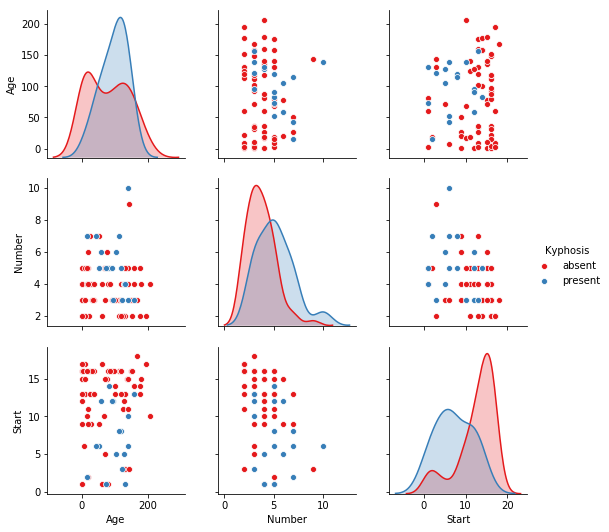

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Divisão treino-teste

Vamos dividir os dados em um conjunto de treinamento e um conjunto de testes!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Número mínimo de amostras para uma divisão de nós** min_samples_split
- Define o número mínimo de amostras (ou observações) que são necessárias para considerar dividir um nó
- Usado para controlar o sobreajuste. Valores mais elevados impedem o modelo de aprender sobre relações que podem ser muito específicas da amostra selecionada para a árvore
- Valores muito elevados podem também levar a sub-ajuste. 


**Número mínimo de amostras para um nó de término (folha)** min_samples_leaf
- Define o número mínimo de amostras (ou observações) necessárias em um nó terminal ou folha
- Usado para controlar sobreajuste semelhante ao min_sample_split
- Em geral, deve-se usar valores mais baixos para problemas de classe mais desbalanceados, porque serão muito pequenas as regiões em que a classe minoritária será majoritária 


**Profundidade máxima da árvore (profundidade vertical)** max_depth
- Define a profundidade máxima de uma árvore
- Usado para controlar sobreajuste, pois uma maior profundidade permitirá ao modelo aprender relações cada vez mais específicas da amostra


**Número máximo de nós de término** max_leaf_nodes
- Define o número máximo de nós de término ou de folhas
- Pode ser definido no lugar de max_depth. Se as árvores criadas forem binárias, uma profundidade de ‘n’ produziria um máximo de 2 ^ n folhas


**Número máximo de atributos a considerar para uma divisão** max_features
- O número de recursos a serem considerados ao procurar uma melhor divisão. Estes recursos serão selecionados aleatoriamente
- Como regra genérica, a raiz quadrada do número total de recursos funciona bem, mas devemos verificar até 30-40% do número total de recursos
- Valores mais altos podem levar a um sobreajuste, mas isso varia de caso a caso


## Previsão e Avaliação

Vamos avaliar a nossa árvore de decisão.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        20
     present       0.00      0.00      0.00         5

   micro avg       0.80      0.80      0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
print(confusion_matrix(y_test,predictions))

[[20  0]
 [ 5  0]]


## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [42]:
# ! pip install pydot
# ! brew install graphviz

In [43]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [31]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [32]:
dot_data = StringIO()

In [33]:
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [34]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

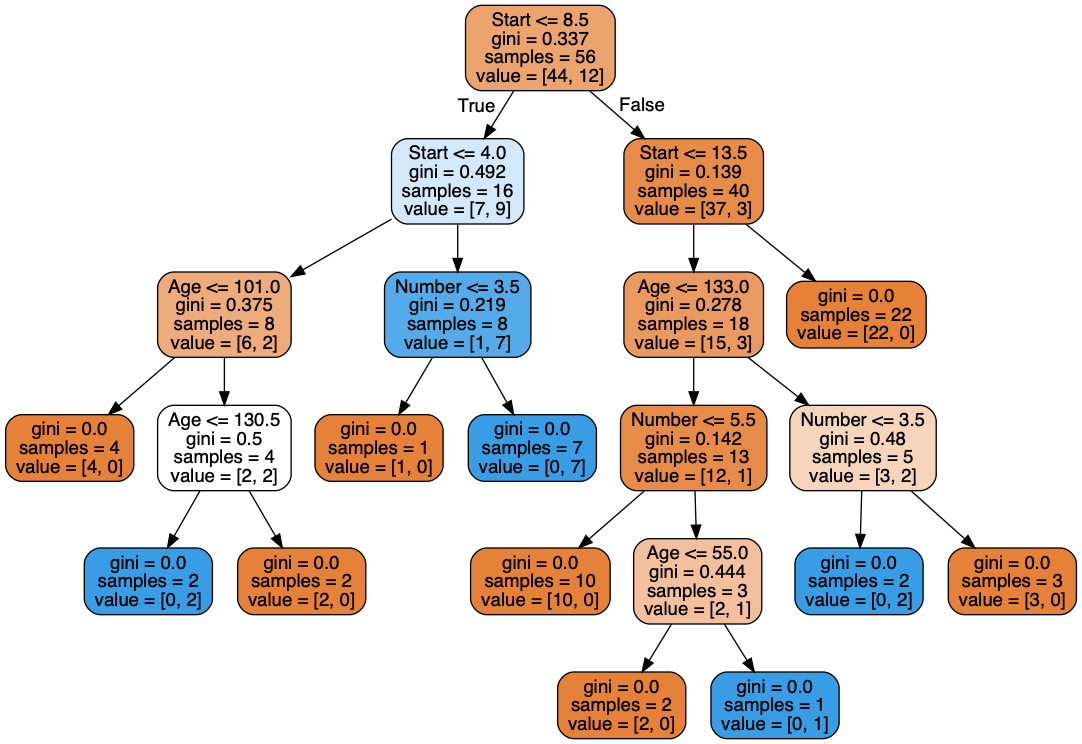

In [36]:
Image(graph[0].create_png()) 

## Florestas aleatórias

Na floresta aleatória, crescemos múltiplas árvores ao invés de uma única árvore no modelo do CART. Para classificar um novo objeto baseado em atributos, cada árvore dá uma classificação, que é como se a árvore desse “votos” para essa classe. A floresta escolhe a classificação que tiver mais votos (de todas as árvores da floresta) e, em caso de regressão, considera a média das saídas por árvores diferentes.

<img src="http://cdn-images-1.medium.com/max/800/1*rLYBTFztVFOpAy7m3OtElg.jpeg">

Funciona da seguinte maneira. Cada árvore é plantada e cultivada da seguinte forma:

- Assuma que o número de casos no conjunto de treinamento é N. Então, a amostra desses N casos é escolhida aleatoriamente, mas com substituição. Esta amostra será o conjunto de treinamento para o cultivo da árvore.
- Se houver M variáveis de entrada, um número m < M é especificado de modo que, em cada nó, m variáveis de M sejam selecionadas aleatoriamente. A melhor divisão nestes m é usada para dividir o nó. O valor de m é mantido constante enquanto crescemos a floresta.
- Cada árvore é cultivada na maior extensão possível e não há poda.
- Preveja novos dados agregando as previsões das árvores ntree (ou seja, votos majoritários para classificação, média para regressão).

### Hiperparâmetro

n_estimators: O parâmetro n_estimators especifica o número de árvores na floresta do modelo. O valor padrão para este parâmetro é 10, o que significa que 10 árvores de decisão diferentes serão construídas no RandomForestClassifier.


https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92


In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 5  0]]


In [40]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        20
     present       0.00      0.00      0.00         5

   micro avg       0.80      0.80      0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
